# Task 2: Prediction using unsupervised ML

<b> Predict the optimum number of clusters and represent it visually <b/>

In [1]:
#importing required libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
#load iris dataset
iris1=datasets.load_iris()

In [3]:
print(iris1.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(iris1.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
iris=pd.DataFrame(iris1.data,columns=iris1.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris.shape

(150, 4)

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


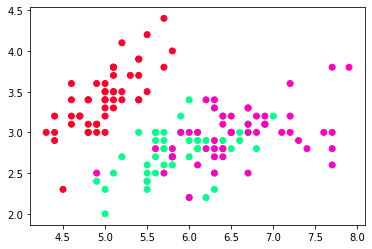

In [9]:
#visualizing the raw dataset
plt.scatter(iris.iloc[:,0],iris.iloc[:,1],c=iris1.target,cmap='gist_rainbow')

In [10]:
#finding the optimum number of clusters
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(iris)
    Sum_of_squared_distances.append(km.inertia_)

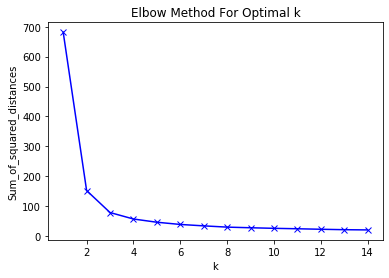

In [11]:
#plotting the results
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [12]:
#applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
#predict the labels of clusters.
label = kmeans.fit_predict(iris)


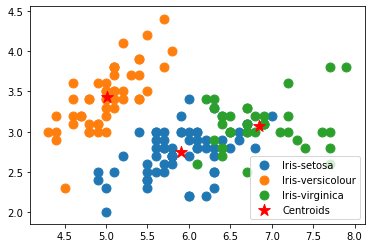

In [17]:
# Visualising the clusters 
x = iris.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[label == 0 , 0] , x[label == 0, 1] ,s=80,label='Iris-setosa')
plt.scatter(x[label == 1 , 0] , x[label == 1 , 1] ,s=80,label='Iris-versicolour')
plt.scatter(x[label == 2 , 0] , x[label == 2 , 1] ,s=80,label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] ,marker='*', s = 150, c='red',label='Centroids')
plt.legend()